In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<ipython-input-4-a21cea4c37a7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.scatter(x,y,


<function matplotlib.pyplot.show(close=None, block=None)>

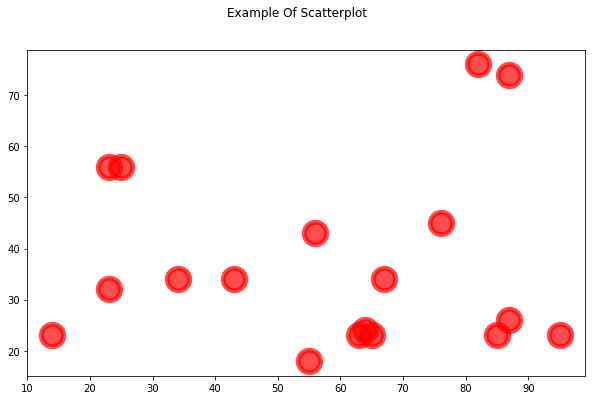

In [4]:
x = [43,76,34,63,56,82,87,55,64,87,95,23,14,65,67,25,23,85]
y = [34,45,34,23,43,76,26,18,24,74,23,56,23,23,34,56,32,23]

fig, ax = plt.subplots(1, figsize =(10,6))
fig.suptitle('Example Of Scatterplot')

ax.scatter(x,y,
          Color = "red",
          s = 500,
          alpha = 0.7,
          linewidths = 5)
plt.show

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/Jupyter_Data_Visualization/master/kanjanaphisek_bangkok_pm25.csv')
df.head(51-100)

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0
...,...,...,...,...,...,...,...
23760,2019,2,5,3,29.0,36,0
23761,2019,2,5,4,27.0,48,0
23762,2019,2,5,5,28.0,52,0
23763,2019,2,5,6,28.0,56,0


In [6]:
df.tail()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
23809,2019,2,7,4,42.0,54,0
23810,2019,2,7,5,33.0,67,0
23811,2019,2,7,6,37.0,62,0
23812,2019,2,7,7,40.0,72,0
23813,2019,2,7,8,34.0,81,0


In [7]:
df['Date']=pd.to_datetime(df[['Year','Month','Day']])

In [8]:
df.dtypes

Year                      int64
Month                     int64
Day                       int64
UTC Hour                  int64
PM2.5                   float64
PM10_mask                 int64
Retrospective             int64
Date             datetime64[ns]
dtype: object

In [9]:
conditions = [
    (df['PM2.5'] < 50),
    (df['PM2.5'] >=50 ) & (df['PM2.5'] <= 100),
    (df['PM2.5'] > 100)
    ]

values = ['low', 'middle', 'High']

df['PM2.5 Level'] = np.select(conditions, values)

In [10]:
df.describe()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.0
mean,2017.126438,6.647014,15.739313,11.478878,26.098018,4.089989,0.0
std,0.875059,3.404619,8.883527,6.925217,15.769880,20.128965,0.0
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,2016.000000,4.000000,8.000000,5.000000,15.300000,0.000000,0.0
50%,2017.000000,7.000000,16.000000,11.000000,21.700000,1.000000,0.0
75%,2018.000000,10.000000,23.000000,17.000000,32.600000,1.000000,0.0
max,2019.000000,12.000000,31.000000,23.000000,150.000000,256.000000,0.0


In [11]:
df['PM2.5 Level']

0        middle
1        middle
2        middle
3        middle
4           low
          ...  
23809       low
23810       low
23811       low
23812       low
23813       low
Name: PM2.5 Level, Length: 23814, dtype: object

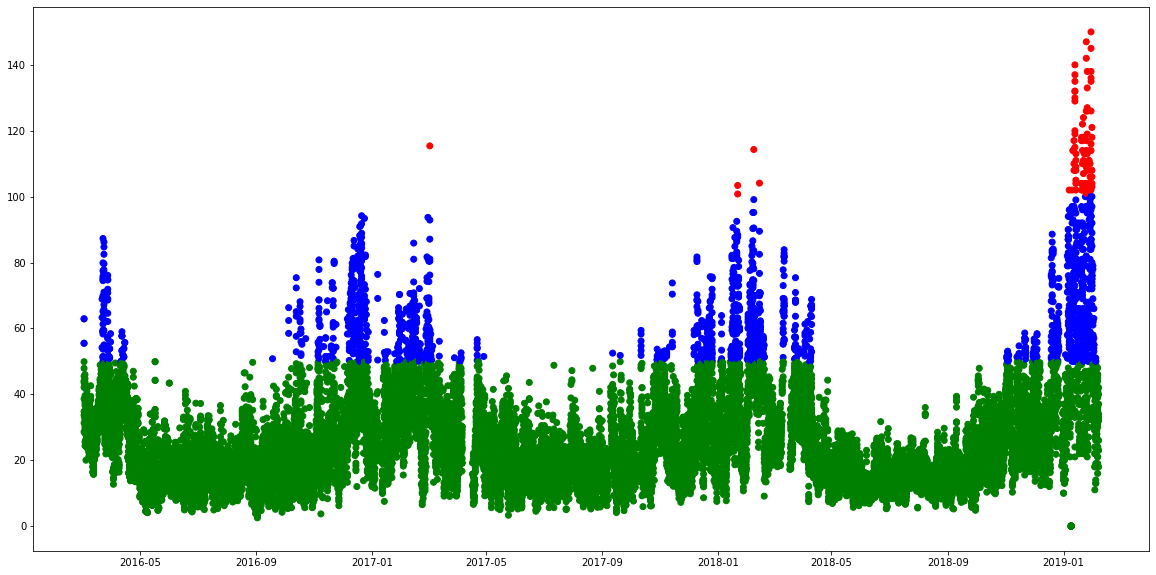

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

colors = {'High':'red', 'low':'green', 'middle':'blue'}
scatter = ax.scatter(df['Date'], df['PM2.5'], c=df['PM2.5 Level'].map(colors))
plt.show()

In [14]:
l = ['Low','Medium','High']
pie = pd.cut(df['PM2.5'],3, labels = l).value_counts()
pie

Low       22006
Medium     1717
High         91
Name: PM2.5, dtype: int64

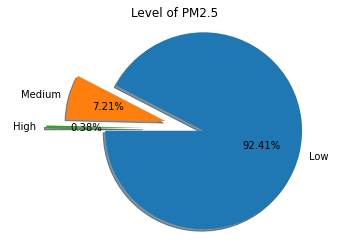

In [16]:
explode = (0.1, 0.3, 0.5)

fig, ax = plt.subplots()
ax.pie(pie,
       explode=explode,
       labels=l,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.axis('equal')
ax.set_title('Level of PM2.5')

plt.show()